<a href="https://colab.research.google.com/github/ducvuuit/CS114.K21.KHTN/blob/master/FinalProjectML/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import các thư viện cần thiết
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

import pandas as pd 



In [74]:
#tải dữ liệu lên
csv_file = open('data-label - 1.csv')


In [75]:
# Kiểm tra dữ liệu
names = ['cmt', 'is_profane']
data = pd.read_csv(csv_file, names = names)
data.head(10)

,cmt,is_profane
0,:( chị đó hỏng chào e,0
1,Zui gần chết,1
2,Zữ qua,0
3,Zô nhà nghỉ đi ỉa hỏi woai,1
4,Yêu thương thế lonn nào được cáii mũi kiaaa :((,1
5,Yêu em,0
6,Yêu đương nhăn nhít,0
7,Yêu chết đi đccc,1
8,Yêu 1 người mà sống bên 1 người ai khóc cho e ...,0
9,Yêu,0


In [76]:
X = data['cmt']

In [77]:
Y = data['is_profane']


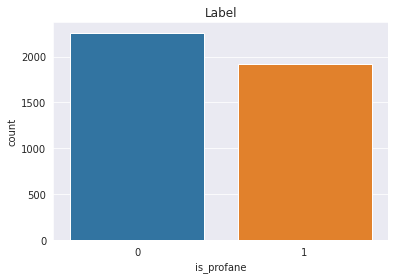

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
sns.countplot(Y).set_title('Label')
plt.show()

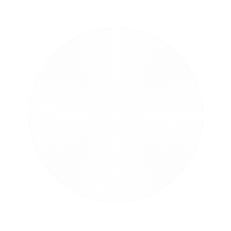

In [91]:
plt.pie(Y)
plt.show()

In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5MB 2.7MB/s 
     |████████████████████████████████| 747kB 49.5MB/s 


In [ ]:
# Tách từ
from pyvi import ViTokenizer
class NLP(object):
    def __init__(self, text = None):
        self.text = text
        #self.set_stopwords()

    def segmentation(self):
        return ViTokenizer.tokenize(self.text)


In [ ]:
# hàm clean data - loại bỏ các ký tự đặc biệt
import re, string
def clean_text(text):
  if type(text) != str:
    return
  else:
    text = text.lower()
    text = re.sub('\[.*?]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
  return text 

In [ ]:
# load stopword
sw =  open('stopword.txt')
data_sw = sw.readlines()
data_sw = [x.strip() for x in data_sw]

['haha', 'hello', 'hi', 'app', 'a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ',

In [ ]:
# hàm loại stopword
def del_stopword(txt):
    t = clean_text(txt)
    if t == '':
        return
    t = NLP(text=t).segmentation()
    #t = set(t)
    #t = list(t)
    t = t.split()
    tt = t
    for x in tt:
      if x in data_sw:
        t.remove(x)
    return t

In [ ]:
n = len(X)
for i in range(n):
    X[i] = del_stopword(X[i])
    #X[i] = ' '.join(X[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i in range(n):
    #X[i] = del_stopword(X[i])
    X[i] = ' '.join(X[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
csv_file = open('boom hàng.csv')

In [126]:
names = ['cmt', 'is_profane']
data1 = pd.read_csv(csv_file, names = names)
data1.head(10)

,cmt,is_profane
0,Em đang xả với 1xx+freship ai qtam ib em nhé,0
1,"1 số đặt đc lần nhiều đơn hả mọi người, tưởng ...",0
2,Ác quá🙄,0
3,Ác thật 😔,0
4,Ác vl,1
5,ad cứ để số đt ra ko cần che. Cho nó hết dùng ...,0
6,Ae chánh ta,0
7,Anh Chun có phải trò này mày chuyên làm ko hả ?,0
8,Anh Nguyen mượn đt làm vài đơn Now,0
9,"Bắt đc cho nó ăn hết số đồ nó đặt, nôn ra thì...",0


In [127]:
X1 = data1['cmt']
Y1= data1['is_profane']


In [128]:
X1

0           Em đang xả với 1xx+freship ai qtam ib em nhé
1      1 số đặt đc lần nhiều đơn hả mọi người, tưởng ...
2                                                Ác quá🙄
3                                              Ác thật 😔
4                                                 Ác vl 
                             ...                        
288             Vkl súc vật chứ đéo phải người các ông à
289                            Vl dc len fan cung 🙂 hihi
290                   Với trường hợp này, tôi đề nghị...
291         Xong sẽ có 1 lý do "cháu/con của e đặt nhầm"
292                                          Xúc vật à ?
Name: cmt, Length: 293, dtype: object

In [129]:
n1 = len(X1)
for i in range(n1):
    X1[i] = del_stopword(X1[i])
    #X[i] = ' '.join(X[i])
for i in range(n1):
    #X[i] = del_stopword(X[i])
    X1[i] = ' '.join(X1[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [130]:
X1

0                       đang xả ai qtam ib nhé
1      đặt đc nhiều đơn hả người tưởng lần đơn
2                                         ác 🙄
3                                         ác 😔
4                                        ác vl
                        ...                   
288                  vkl súc_vật đéo người ông
289                  vl dc len fan cung 🙂 hihi
290                     trường_hợp tôi đề_nghị
291               xong có_lý_do cháucon e nhầm
292                                    xúc vật
Name: cmt, Length: 293, dtype: object

In [ ]:
model1 = LogisticRegression()
model2 = MultinomialNB()
model3 = LinearSVC()
# split test:25%, train:75%
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.5,random_state=42)

# initialize TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df=2)

# transform words to vetor
trainX = tf.fit_transform(trainX.values).toarray()
trainVocab = tf.vocabulary_ 
tf = TfidfVectorizer(vocabulary=trainVocab)
testX = tf.fit_transform(testX.values).toarray()
print("[INFO] Used TfidfVectorizer ... ")

for i in range(3):
    
    if i == 2:
        model = LogisticRegression()
        print("   [INFO] evaluating Logistic Regression...")

    if i == 0:
        model = LinearSVC()
        print("   [INFO] evaluating SVM...")
    
    if i == 1:
        model = MultinomialNB()
        print("   [INFO] evaluating Naive Bayes...")
    
    # train and evaluating 
    model.fit(trainX, trainY)
    predictions = model.predict(testX)
    print(classification_report(testY,predictions))

In [131]:
model1 = LogisticRegression()
model2 = MultinomialNB()
model3 = LinearSVC()
# split test:25%, train:75%
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.5,random_state=42)

# initialize TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df=2)

# transform words to vetor
trainX = tf.fit_transform(trainX.values).toarray()
trainVocab = tf.vocabulary_ 
tf = TfidfVectorizer(vocabulary=trainVocab)
X1 = tf.fit_transform(X1.values).toarray()
print("[INFO] Used TfidfVectorizer ... ")

for i in range(3):
    
    if i == 2:
        model = LogisticRegression()
        print("   [INFO] evaluating Logistic Regression...")

    if i == 0:
        model = LinearSVC()
        print("   [INFO] evaluating SVM...")
    
    if i == 1:
        model = MultinomialNB()
        print("   [INFO] evaluating Naive Bayes...")
    
    # train and evaluating 
    model.fit(trainX, trainY)
    predictions = model.predict(X1)
    print(classification_report(Y1,predictions))

[INFO] Used TfidfVectorizer ... 
   [INFO] evaluating SVM...
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       170
           1       0.71      0.48      0.57       123

    accuracy                           0.70       293
   macro avg       0.70      0.67      0.67       293
weighted avg       0.70      0.70      0.69       293

   [INFO] evaluating Naive Bayes...
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       170
           1       0.57      0.52      0.54       123

    accuracy                           0.63       293
   macro avg       0.62      0.62      0.62       293
weighted avg       0.63      0.63      0.63       293

   [INFO] evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.65      0.96      0.78       170
           1       0.84      0.29      0.43       123

    accuracy                           0.

In [61]:
def processing(text):
    text = clean_text(text)
    text = del_stopword(text)
    text = ' '.join(text)
    text = tf.fit_transform([text])
    return text
    

In [70]:
test = 'chó đẻ'
test = processing(test)
predict = model.predict(test)

if predict == 1:
  print("câu bình luận thô tục, xúc phạm, cần được xóa")
else:
  print('Câu bình luận bình thường')

Câu bình luận bình thường


In [ ]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']